In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Read csv data
psyco = pd.read_csv("psyco1.csv")
psyco1 = psyco.copy()
psyco1.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,Other/not working,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,0-18,Male,Student in School,Other/not working,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,Other/not working,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,Other/not working,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,Other/not working,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [18]:
psyco1['gender'] = LabelEncoder().fit_transform(psyco1['gender'])
psyco1['age'] = LabelEncoder().fit_transform(psyco1['age'])
psyco1['occupation'] = LabelEncoder().fit_transform(psyco1['occupation'])
psyco1['line_of_work'] = LabelEncoder().fit_transform(psyco1['line_of_work'])
psyco1['prefer'] = LabelEncoder().fit_transform(psyco1['prefer'])
psyco1['certaindays_hw'] = LabelEncoder().fit_transform(psyco1['certaindays_hw'])

In [19]:
psyco1.keys()

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw'],
      dtype='object')

In [20]:
psyco1.isna().sum()

age               0
gender            0
occupation        0
line_of_work      0
time_bp           0
time_dp           0
travel_time       0
easeof_online     0
home_env          0
prod_inc          0
sleep_bal         0
new_skill         0
fam_connect       0
relaxed           0
self_time         0
like_hw           0
dislike_hw        0
prefer            0
certaindays_hw    0
dtype: int64

In [21]:
psyco1.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,1,1,5,7,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,0,2
1,0,1,6,7,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,0,1
2,1,1,5,7,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,0,2
3,1,1,5,7,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,0,2
4,1,0,5,7,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,0,2


In [22]:
scaler = StandardScaler()

# Define the columns to be standardized
columns_to_standardize = ["occupation", "line_of_work", "certaindays_hw", "like_hw", "dislike_hw", "age", "time_bp", "time_dp", "travel_time", "easeof_online", "home_env", "prod_inc", "sleep_bal", "new_skill", "fam_connect", "relaxed", "self_time"]
#columns_to_standardize = ["like_hw", "dislike_hw"]
# Fit the scaler to the selected columns and transform the data
psyco1[columns_to_standardize] = scaler.fit_transform(psyco1[columns_to_standardize])

In [23]:
psyco1.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,-0.924820,1,0.043083,0.316183,-0.20719,-1.118996,-0.740045,0.368080,0.200490,-0.014535,0.175435,0.548935,1.077260,-0.855317,-1.077189,-1.357072,-1.294683,0,0.931136
1,-1.520578,1,0.487135,0.316183,-0.20719,1.140145,-0.740045,1.157303,-0.609048,-0.827779,0.980651,-1.782386,1.077260,1.539434,1.694410,0.804100,0.914017,0,-0.277797
2,-0.924820,1,0.043083,0.316183,-0.20719,-0.365949,0.662459,-0.421143,-0.609048,1.611954,0.175435,0.548935,0.348963,0.741184,0.770544,0.780585,-1.075605,0,0.931136
3,-0.924820,1,0.043083,0.316183,-0.20719,-0.365949,0.662459,0.368080,-1.418586,-0.014535,1.785868,0.548935,-0.379334,-1.653567,-1.077189,-1.357072,0.916008,0,0.931136
4,-0.924820,0,0.043083,0.316183,-0.20719,-0.365949,0.662459,-0.421143,-0.609048,-0.014535,0.175435,-0.228172,-0.379334,0.741184,-0.153322,0.588196,0.694939,0,0.931136


In [24]:
columns_to_encode = ['gender', 'prefer']
encoded_df = pd.get_dummies(psyco1, columns=columns_to_encode)

In [30]:
encoded_df.head()

,age,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,...,relaxed,self_time,like_hw,dislike_hw,certaindays_hw,gender_0,gender_1,gender_2,prefer_0,prefer_1
0,-0.924820,0.043083,0.316183,-0.20719,-1.118996,-0.740045,0.368080,0.200490,-0.014535,0.175435,...,-0.855317,-1.077189,-1.357072,-1.294683,0.931136,0,1,0,1,0
1,-1.520578,0.487135,0.316183,-0.20719,1.140145,-0.740045,1.157303,-0.609048,-0.827779,0.980651,...,1.539434,1.694410,0.804100,0.914017,-0.277797,0,1,0,1,0
2,-0.924820,0.043083,0.316183,-0.20719,-0.365949,0.662459,-0.421143,-0.609048,1.611954,0.175435,...,0.741184,0.770544,0.780585,-1.075605,0.931136,0,1,0,1,0
3,-0.924820,0.043083,0.316183,-0.20719,-0.365949,0.662459,0.368080,-1.418586,-0.014535,1.785868,...,-1.653567,-1.077189,-1.357072,0.916008,0.931136,0,1,0,1,0
4,-0.924820,0.043083,0.316183,-0.20719,-0.365949,0.662459,-0.421143,-0.609048,-0.014535,0.175435,...,0.741184,-0.153322,0.588196,0.694939,0.931136,1,0,0,1,0


In [25]:
y = encoded_df['self_time']

# Select the features (predictors), excluding the target variable
#X = psyco1.drop(columns=['self_time'])
X = encoded_df.drop(columns=['self_time', 'like_hw', 'dislike_hw'])

In [26]:
y

0      -1.077189
1       1.694410
2       0.770544
3      -1.077189
4      -0.153322
          ...   
1170   -0.153322
1171   -1.077189
1172   -0.153322
1173   -1.077189
1174    0.770544
Name: self_time, Length: 1175, dtype: float64

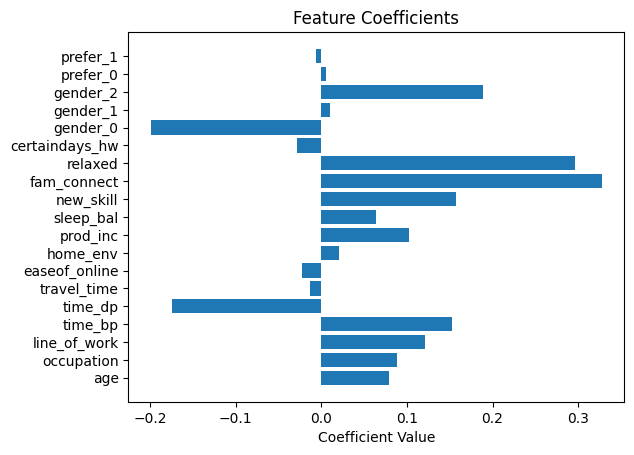

{'LR - MAE': 0.43790909210397383,
 'LR - R-squared': 0.6594013559393591,
 'LR - Intercept': 0.07980491972650672}

In [27]:
def perform_linear_regression(X, y, test_size=0.2, random_state=12):
    # Split the data into a training set and a testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create and fit the linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Make predictions on the test set
    lr_y_pred = lr_model.predict(X_test)

    # Evaluate the model
    lr_MAE = mean_absolute_error(y_test, lr_y_pred)
    lr_r2 = r2_score(y_test, lr_y_pred)

    # Coefficients of the linear regression model
    lr_intercept = lr_model.intercept_
    lr_coefficients = lr_model.coef_

    coef = lr_model.coef_
    feature_names = X.columns
    plt.barh(feature_names, coef)
    plt.xlabel("Coefficient Value")
    plt.title("Feature Coefficients")
    plt.show()

    return {
        "LR - MAE": lr_MAE,
        "LR - R-squared": lr_r2,
        "LR - Intercept": lr_intercept,
    }
perform_linear_regression(X,y)

In [28]:
def perform_decision_tree_regression(X, y, test_size=0.2, random_state=12):
    # Split the data into a training set and a testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create and fit the Decision Tree Regression model
    r_tree_model = DecisionTreeRegressor(random_state=random_state)
    r_tree_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = r_tree_model.predict(X_test)

    # Evaluate the model
    r_tree_MAE = mean_absolute_error(y_test, y_pred)
    r_tree_r2 = r2_score(y_test, y_pred)

    return {
        "MAE": r_tree_MAE,
        "R-squared": r_tree_r2,
        "Model": r_tree_model 
    }
perform_decision_tree_regression(X,y)

{'MAE': 0.1769105208442896,
 'R-squared': 0.7855905730986916,
 'Model': DecisionTreeRegressor(random_state=12)}

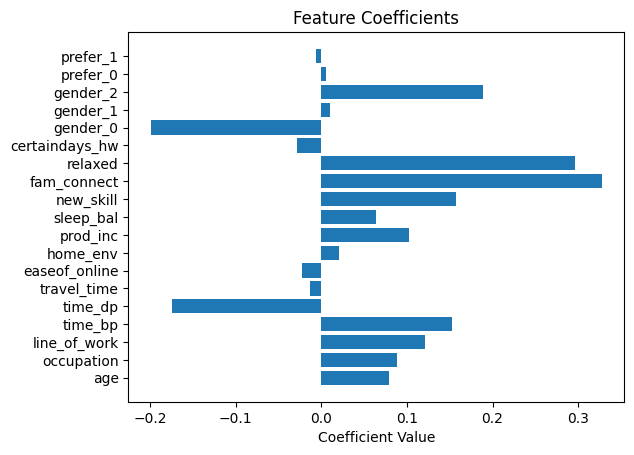

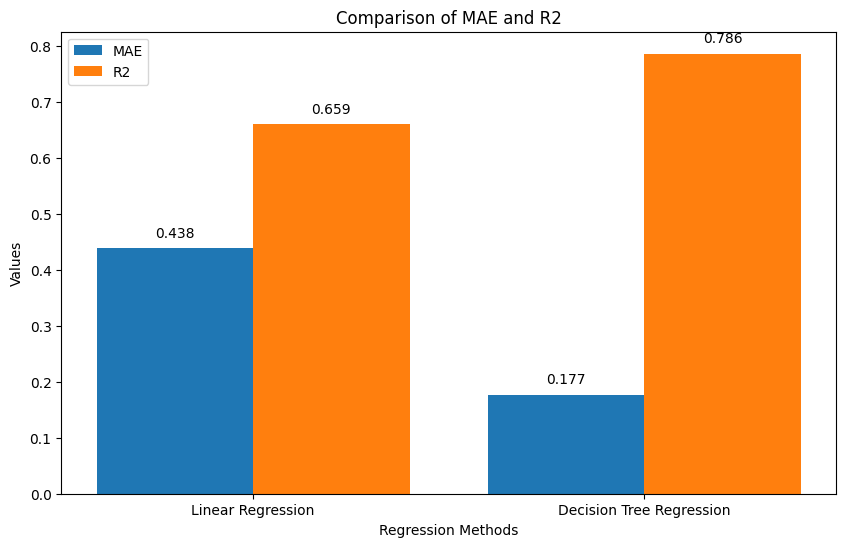

In [29]:
# Perform Linear Regression
linear_results = perform_linear_regression(X, y)

# Perform Decision Tree Regression
decision_tree_results = perform_decision_tree_regression(X, y)

# Perform Scaled Linear Regression


# Extract MAE and R2 values
linear_MAE = linear_results["LR - MAE"]
linear_r2 = linear_results["LR - R-squared"]
decision_tree_MAE = decision_tree_results["MAE"]
decision_tree_r2 = decision_tree_results["R-squared"]

# Create bar plots to compare MAE and R2 values
methods = ['Linear Regression', 'Decision Tree Regression']
MAE_values = [linear_MAE, decision_tree_MAE]
r2_values = [linear_r2, decision_tree_r2]

x = np.arange(len(methods))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, MAE_values, width=0.4, label='MAE')
plt.bar(x + 0.2, r2_values, width=0.4, label='R2')

for i, MAE_value in enumerate(MAE_values):
    plt.annotate(f'{MAE_value:.3f}', (x[i] - 0.2, MAE_value + 0.02), ha='center')

# Annotate R2 values
for i, r2_value in enumerate(r2_values):
    plt.annotate(f'{r2_value:.3f}', (x[i] + 0.2, r2_value + 0.02), ha='center')
plt.xticks(x, methods)
plt.xlabel('Regression Methods')
plt.ylabel('Values')
plt.title('Comparison of MAE and R2')
plt.legend()
plt.show()
